In [1]:
import utils_data as ut
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import net
from trainer import train
from transformers import BertForMaskedLM, BertTokenizer

In [2]:
CLASSES = {'POLYMER': 1,
           'ORGANIC': 2,
           'MONOMER': 3,
           'PROP_NAME': 4,
           'INORGANIC': 5,
           'MATERIAL_AMOUNT': 6,
           'POLYMER_FAMILY': 7,
           'PROP_VALUE': 8,
           'O': 0}
N_DATA = 0  # 0 is all
BATCH_SIZE = 5
SEED = 1421
MAX_LENGTH = 512
CLASS_WEIGHTS = [0.01, 0.5, 1, 1, 0.8, 1, 1, 1, 0.5]
LEARNING_RATE = 0.0001
N_EPOCHS = 8

In [3]:
ut.seed_everything(SEED)

In [4]:
tokenizerBERT = BertTokenizer.from_pretrained('pranav-s/MaterialsBERT', model_max_length=MAX_LENGTH)
modelBERT = BertForMaskedLM.from_pretrained('pranav-s/MaterialsBERT')
model = net.NERBERTModel(modelBERT.base_model, output_size=len(CLASSES)+1)

Epoch 1
Mean training loss: 0.9409
Mean training accuracy: 0.7417
Test accuracy: 0.7857


Epoch 2
Mean training loss: 0.5107
Mean training accuracy: 0.8641
Test accuracy: 0.7972


Epoch 3
Mean training loss: 0.3487
Mean training accuracy: 0.9089
Test accuracy: 0.7839


Epoch 4
Mean training loss: 0.2528
Mean training accuracy: 0.9402
Test accuracy: 0.7565


Epoch 5
Mean training loss: 0.2139
Mean training accuracy: 0.9499
Test accuracy: 0.7702


Epoch 6
Mean training loss: 0.1648
Mean training accuracy: 0.9620
Test accuracy: 0.8034


Epoch 7
Mean training loss: 0.1082
Mean training accuracy: 0.9774
Test accuracy: 0.7914


Epoch 8
Mean training loss: 0.0959
Mean training accuracy: 0.9799
Test accuracy: 0.7539




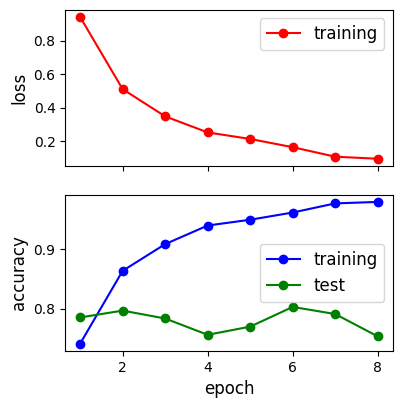

In [5]:
model, train_losses, train_accuracies, test_accuracies, pred_classes, true_classes, pred_all, true_all, data_list = train(model, tokenizerBERT, 
   'data/train.json', 'data/test.json', CLASSES, N_DATA, BATCH_SIZE, SEED, MAX_LENGTH, CLASS_WEIGHTS, LEARNING_RATE, N_EPOCHS, plot=True, save_model=True)

# Sanity check

In [12]:
sample_id = 9
start, end = 20, 50
print(CLASSES)
print()
print(f"Sample {sample_id}, Words {start} to {end}:")
print(f"{data_list[sample_id]['words'][start:end]}")
print()
print(f"True classes for Sample {sample_id}, Words {start} to {end}:")
print(true_all[sample_id, start:end])
print(f"Predicted classes for Sample {sample_id}, Words {start} to {end}:")
print(pred_all[sample_id, :, :].max(dim=0)[1][start:end])
print()


{'POLYMER': 1, 'ORGANIC': 2, 'MONOMER': 3, 'PROP_NAME': 4, 'INORGANIC': 5, 'MATERIAL_AMOUNT': 6, 'POLYMER_FAMILY': 7, 'PROP_VALUE': 8, 'O': 0}

Sample 9, Words 20 to 50:
['was', 'observed', 'due', 'to', 'the', 'presence', 'of', 'a', 'rigid', 'tetraphenylsilane', '-', 'based', 'polymer', 'backbone', '(', 'T_{g', '}', '=', '218', '°', 'C', ',', 'T_{d', '}', '=', '373', '°', 'C', ')', '.']

True classes for Sample 9, Words 20 to 50:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 8, 8, 0, 4, 4,
        0, 8, 8, 8, 0, 0])
Predicted classes for Sample 9, Words 20 to 50:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 8, 8, 8, 0, 4, 4,
        0, 8, 8, 8, 0, 0])

